<a href="https://colab.research.google.com/github/aadityadamle/FakeNews/blob/master/Fake%20News%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Give the datasource reference here

The dataset of this project is taken from Kaggle. This dataset is divided into two files one of which contains fake news (fake.csv) and other contains true new (true.csv). We have to combine the two files before we do any futher processing.
(https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset)

**1. Importing necessary libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [2]:
#Stopwords are the words in any language which does not add much meaning to a sentence. 
#They can safely be ignored without sacrificing the meaning of the sentence.
# We download stopwords to get a list of such stopwords in english and then remove them from our data.
nltk.download("stopwords")

# Punkt Sentence Tokenizer. This tokenizer divides a text into a list of sentences,
# by using an unsupervised algorithm to build a model for abbreviation words, collocations,
# and words that start sentences. Here we use its instance word_tokenize to get a list of all words in our data. 
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**2. Loading the datasets**

In [3]:
!wget https://github.com/aadityadamle/FakeNews/blob/master/572515_1037534_compressed_Fake.csv.zip?raw=true
!wget https://github.com/aadityadamle/FakeNews/blob/master/572515_1037534_compressed_True.csv.zip?raw=true

--2020-08-12 11:59:29--  https://github.com/aadityadamle/FakeNews/blob/master/572515_1037534_compressed_Fake.csv.zip?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/aadityadamle/FakeNews/raw/master/572515_1037534_compressed_Fake.csv.zip [following]
--2020-08-12 11:59:29--  https://github.com/aadityadamle/FakeNews/raw/master/572515_1037534_compressed_Fake.csv.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aadityadamle/FakeNews/master/572515_1037534_compressed_Fake.csv.zip [following]
--2020-08-12 11:59:29--  https://raw.githubusercontent.com/aadityadamle/FakeNews/master/572515_1037534_compressed_Fake.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecti

In [4]:
!unzip "/content/572515_1037534_compressed_Fake.csv.zip?raw=true"
!unzip "/content/572515_1037534_compressed_True.csv.zip?raw=true"

Archive:  /content/572515_1037534_compressed_Fake.csv.zip?raw=true
  inflating: Fake.csv                
Archive:  /content/572515_1037534_compressed_True.csv.zip?raw=true
  inflating: True.csv                


In [5]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")
print(fake.head())
print(true.head())

                                               title  ...               date
0   Donald Trump Sends Out Embarrassing New Year’...  ...  December 31, 2017
1   Drunk Bragging Trump Staffer Started Russian ...  ...  December 31, 2017
2   Sheriff David Clarke Becomes An Internet Joke...  ...  December 30, 2017
3   Trump Is So Obsessed He Even Has Obama’s Name...  ...  December 29, 2017
4   Pope Francis Just Called Out Donald Trump Dur...  ...  December 25, 2017

[5 rows x 4 columns]
                                               title  ...                date
0  As U.S. budget fight looms, Republicans flip t...  ...  December 31, 2017 
1  U.S. military to accept transgender recruits o...  ...  December 29, 2017 
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...  December 31, 2017 
3  FBI Russia probe helped by Australian diplomat...  ...  December 30, 2017 
4  Trump wants Postal Service to charge 'much mor...  ...  December 29, 2017 

[5 rows x 4 columns]


# Add code to display one single news

In [6]:
# showing an example of headline of fake news which is from title column
print("Fake news headline: "+fake.iloc[0,0])

# showing an example of headline of true news which is from title column
print("True news headline: "+true.iloc[0,0])


Fake news headline:  Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing
True news headline: As U.S. budget fight looms, Republicans flip their fiscal script


In [7]:
print(fake.shape)
print(true.shape)

(23481, 4)
(21417, 4)


As you can  see above that we have 23481 records of fake news while 21417 of true news and we will have to combine these dataframes before building a model on them. So the combined dataframe will have a huge number of records, so huge that some classifiers will under perform. Hence we are shrinking the data and will train our classifiers on half the data.

In [8]:
# shrinking data to train smoothly
fake = fake[:11740]
true = true[:10708]

print(fake.head())
print(true.head())

                                               title  ...               date
0   Donald Trump Sends Out Embarrassing New Year’...  ...  December 31, 2017
1   Drunk Bragging Trump Staffer Started Russian ...  ...  December 31, 2017
2   Sheriff David Clarke Becomes An Internet Joke...  ...  December 30, 2017
3   Trump Is So Obsessed He Even Has Obama’s Name...  ...  December 29, 2017
4   Pope Francis Just Called Out Donald Trump Dur...  ...  December 25, 2017

[5 rows x 4 columns]
                                               title  ...                date
0  As U.S. budget fight looms, Republicans flip t...  ...  December 31, 2017 
1  U.S. military to accept transgender recruits o...  ...  December 29, 2017 
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...  December 31, 2017 
3  FBI Russia probe helped by Australian diplomat...  ...  December 30, 2017 
4  Trump wants Postal Service to charge 'much mor...  ...  December 29, 2017 

[5 rows x 4 columns]


In [9]:
# The last data item after shrink
print(fake.iloc[-1])
print(true.iloc[-1])

title      LOVIN’ IT! ARIZONA DUNKIN’ DONUTS Stirs It Up ...
text                                                        
subject                                             politics
date                                             Feb 4, 2017
Name: 11739, dtype: object
title      Senators say Republican consensus is no vote o...
text       WASHINGTON (Reuters) - Key senators said on Tu...
subject                                         politicsNews
date                                      February 23, 2016 
Name: 10707, dtype: object


**3. Preprocess the Data**

In [10]:
# Entering 1 for fake and 0 for true in fake_news 
# column for both the dataframes
fake_news = []
for row in range(len(fake)):
  fake_news.append("fake")
fake["is_fake"] = fake_news

fake_news = []
for row in range(len(true)):
  fake_news.append("true")
true["is_fake"] = fake_news

In [11]:
print(fake.head())
print(true.head())

                                               title  ... is_fake
0   Donald Trump Sends Out Embarrassing New Year’...  ...    fake
1   Drunk Bragging Trump Staffer Started Russian ...  ...    fake
2   Sheriff David Clarke Becomes An Internet Joke...  ...    fake
3   Trump Is So Obsessed He Even Has Obama’s Name...  ...    fake
4   Pope Francis Just Called Out Donald Trump Dur...  ...    fake

[5 rows x 5 columns]
                                               title  ... is_fake
0  As U.S. budget fight looms, Republicans flip t...  ...    true
1  U.S. military to accept transgender recruits o...  ...    true
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...    true
3  FBI Russia probe helped by Australian diplomat...  ...    true
4  Trump wants Postal Service to charge 'much mor...  ...    true

[5 rows x 5 columns]


In [12]:
# We are using merge function to combine both the datafames. 
# Keyword "outer" is used to include all the columns during merge. 
news = pd.merge(fake,true, how = "outer")
news

,title,text,subject,date,is_fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
...,...,...,...,...,...
22443,Senators push protections for opioid-dependent...,WASHINGTON (Reuters) - Key senators said on Tu...,politicsNews,"February 23, 2016",true
22444,Judiciary committee senators won't consider Ob...,WASHINGTON (Reuters) - Republicans on the U.S....,politicsNews,"February 23, 2016",true
22445,N.C. city's vote to expand transgender rights ...,(Reuters) - A top North Carolina lawmaker vowe...,politicsNews,"February 23, 2016",true
22446,Italy summons U.S. ambassador after reports U....,ROME (Reuters) - Italy’s foreign ministry summ...,politicsNews,"February 23, 2016",true


fake    11740
true    10708
Name: is_fake, dtype: int64


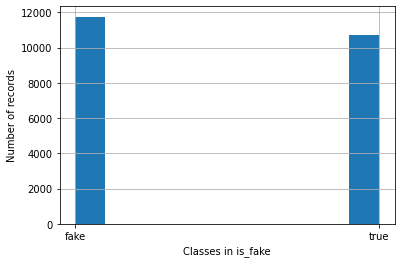

In [13]:
# check class distribution
classes = news["is_fake"]
print(classes.value_counts())
classes.hist()
plt.xlabel("Classes in is_fake")
plt.ylabel("Number of records")
plt.show()

In [14]:
# convert class labels to binary values, 0 = fake and 1 = true
encoder = LabelEncoder()
is_fake = encoder.fit_transform(classes)

print(is_fake[:10])

[0 0 0 0 0 0 0 0 0 0]


In [15]:
# store the headlines of every news and print first 10 headlines 
headlines = news["title"]
print(headlines[:10])

0     Donald Trump Sends Out Embarrassing New Year’...
1     Drunk Bragging Trump Staffer Started Russian ...
2     Sheriff David Clarke Becomes An Internet Joke...
3     Trump Is So Obsessed He Even Has Obama’s Name...
4     Pope Francis Just Called Out Donald Trump Dur...
5     Racist Alabama Cops Brutalize Black Boy While...
6     Fresh Off The Golf Course, Trump Lashes Out A...
7     Trump Said Some INSANELY Racist Stuff Inside ...
8     Former CIA Director Slams Trump Over UN Bully...
9     WATCH: Brand-New Pro-Trump Ad Features So Muc...
Name: title, dtype: object


In [16]:
# Remove punctuation. We are using regular expression to remove 
# punctuation from the selected string. The line below takes every
# headline from headlines and converts it into a string. The quoted
# '[^\w\d\s]' is an RE used to track any punctuation and then we 
# replace it with an empty space.
headlines = headlines.str.replace(r'[^\w\d\s]', ' ')


In [17]:
#change words to lowercase
headlines = headlines.str.lower() 
print(headlines[:10])

0     donald trump sends out embarrassing new year ...
1     drunk bragging trump staffer started russian ...
2     sheriff david clarke becomes an internet joke...
3     trump is so obsessed he even has obama s name...
4     pope francis just called out donald trump dur...
5     racist alabama cops brutalize black boy while...
6     fresh off the golf course  trump lashes out a...
7     trump said some insanely racist stuff inside ...
8     former cia director slams trump over un bully...
9     watch  brand new pro trump ad features so muc...
Name: title, dtype: object


Stopwords are the words in any language which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For some search engines, these are some of the most common, short function words, such as the, is, at, which, and on.

In [18]:
#Removing stopwords from news headlines

stop_words = set(stopwords.words("english")) 

headlines = headlines.apply(lambda x : " ".join(word for word in x.split() if word not in stop_words))

print(headlines[:10])

0    donald trump sends embarrassing new year eve m...
1    drunk bragging trump staffer started russian c...
2    sheriff david clarke becomes internet joke thr...
3    trump obsessed even obama name coded website i...
4    pope francis called donald trump christmas speech
5    racist alabama cops brutalize black boy handcu...
6    fresh golf course trump lashes fbi deputy dire...
7    trump said insanely racist stuff inside oval o...
8    former cia director slams trump un bullying op...
9    watch brand new pro trump ad features much kis...
Name: title, dtype: object


Removing stopwords can potentially help improve the performance as there are fewer and only meaningful tokens left. Thus, it could increase classification accuracy. Even search engines like Google remove stopwords for fast and relevant retrieval of data from the database.

In English grammar and morphology, a stem is the form of a word before any inflectional affixes are added. In English, most stems also qualify as words. The term base is commonly used by linguists to refer to any stem (or root) to which an affix is attached.

In [19]:
# Remove affixes to give stems using a Porter stemmer
ps = nltk.PorterStemmer()

headlines = headlines.apply(lambda x: ' '.join(ps.stem(word) 
                            for word in x.split()))

print(headlines[:10])

0    donald trump send embarrass new year eve messa...
1    drunk brag trump staffer start russian collus ...
2    sheriff david clark becom internet joke threat...
3        trump obsess even obama name code websit imag
4        pope franci call donald trump christma speech
5    racist alabama cop brutal black boy handcuff g...
6    fresh golf cours trump lash fbi deputi directo...
7    trump said insan racist stuff insid oval offic...
8    former cia director slam trump un bulli openli...
9    watch brand new pro trump ad featur much kiss ...
Name: title, dtype: object


By using PorterStemmer we have successfully removed all the affixes and only root words remain. For instance "sends" in the first headline becomes "send" and "embarrassing" becomes embarrass.    

**4. Generating Features**

In [20]:
# creating a collection of all the words

all_words = []

for line in headlines:
    words = word_tokenize(line)
    for word in words:
        all_words.append(word)

print(len(all_words))        

all_words = nltk.FreqDist(all_words)

206497


In [21]:
# print the total number of words and the 15 most common words
print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(15)))

Number of words: 10174
Most common words: [('trump', 11274), ('video', 4022), ('u', 3198), ('say', 1980), ('republican', 1602), ('hous', 1584), ('senat', 1416), ('obama', 1401), ('watch', 1279), ('white', 1130), ('presid', 981), ('clinton', 978), ('tweet', 970), ('bill', 919), ('democrat', 886)]


So we have approx. 206500 words in total made from 10,174 unique words and nltk.FreqDist() function gives us the frequency of occurence of each word. The most_common function when applied to the result of FreqDist() gives a list of tuples containing words with highest frequency and their corresponding frequency in descending order.

In [22]:
# use the 2300 most common words as features
word_features = list(all_words.keys())[:2300]

In [23]:
# The find_features function will determine which of 
# the 2300 word features are contained in the headlines
def find_features(headline):
    words = word_tokenize(headline)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    return features

# Let's see an example!
features = find_features(headlines[0])
for key, value in features.items():
    if value == True:
        print(key)

donald
trump
send
embarrass
new
year
eve
messag
disturb


Note: The code below is delicate as we are using shuffle function and generating featuresset. If you run into any error then do not re-run the cell.
Instead restart the kernel and run all the cells again.

In [24]:
# Now lets do it for all the headlines
headlines = list(zip(headlines, is_fake))
# define a seed for reproducibility
seed = 1
np.random.seed = seed
np.random.shuffle(headlines)

# call find_features function for each headline
featuresets = [(find_features(headline), category) for (headline, category) in headlines]


In [25]:
# we can split the featuresets into training and testing datasets using model_selection in sklearn
# split the data into training and testing datasets

training, testing = train_test_split(featuresets, 
                                     test_size = 0.25, 
                                     random_state=seed)

In [26]:
print(len(training))
print(len(testing))

16836
5612


**5. Scikit-Learn Classifiers with NLTK**

> 
We'll need to import each algorithm we plan on using from sklearn. We also need to import some performance metrics, such as accuracy_score and classification_report.



In [27]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, max_error

nltk_model = SklearnClassifier(LogisticRegression(verbose=True))

# train the model on the training data
nltk_model.train(training)

# and test on the testing dataset!
accuracy = nltk.classify.accuracy(nltk_model, testing)*100
print("Logistic Regression Accuracy: {}".format(accuracy))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.7s finished


Logistic Regression Accuracy: 92.78332145402709


# **Introduction to Classifiers**
# KNeighborsClassifier()
> The K-neighbors classification in KNeighborsClassifier is the most commonly used technique. The optimal choice of the value K is highly data-dependent: in general a larger K suppresses the effects of noise, but makes the classification boundaries less distinct.

# DecisionTreeClassifier()
> DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, of size [n_samples, n_features] holding the training samples, and an array Y of integer values, size [n_samples], holding the class labels for the training samples.It is capable of both binary classification and multiclass classification.

# RandomForestClassifier()
>A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

# SGDClassifier()
>This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning via the partial_fit method. For best results using the default learning rate schedule, the data should have zero mean and unit variance.This implementation works with data represented as dense or sparse arrays of floating point values for the features. The model it fits can be controlled with the loss parameter; by default, it fits a linear support vector machine (SVM).

# MultinomialNB()
>MultinomialNB implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice).The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

# SVC()
>The implementation is based on libsvm. The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples.The multiclass support is handled according to a one-vs-one scheme. 












In [28]:
# Define models to train
names = ["K Nearest Neighbors", 
         "Decision Tree", 
         "Random Forest",  
         "SGD Classifier",
         "Naive Bayes", 
         "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = zip(names, classifiers)

for name, model in models:
    nltk_model = SklearnClassifier(model)
    nltk_model.train(training)
    accuracy = nltk.classify.accuracy(nltk_model, testing)*100
    print("{} Accuracy: {}".format(name, accuracy))

K Nearest Neighbors Accuracy: 66.80327868852459
Decision Tree Accuracy: 87.27726300784035
Random Forest Accuracy: 91.07270135424092
SGD Classifier Accuracy: 92.74768353528154
Naive Bayes Accuracy: 91.00142551674982
SVM Linear Accuracy: 92.60513186029937


#Purpose of VotingClassifier
The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses.

In majority voting, the predicted class label for a particular sample is the class label that represents the majority (mode) of the class labels predicted by each individual classifier.

E.g., if the prediction for a given sample is

classifier 1 -> class 1

classifier 2 -> class 1

classifier 3 -> class 2

the VotingClassifier (with voting='hard') would classify the sample as “class 1” based on the majority class label.

In the cases of a tie, the VotingClassifier will select the class based on the ascending sort order. E.g., in the following scenario

classifier 1 -> class 2

classifier 2 -> class 1

the class label 1 will be assigned to the sample.

The output of the next cell will be the accuracy of our model computed as explained above. 

In [29]:
# Ensemble methods - Voting classifier
from sklearn.ensemble import VotingClassifier

names = ["K Nearest Neighbors", 
         "Decision Tree", 
         "Random Forest", 
         "Logistic Regression", 
         "SGD Classifier",
         "Naive Bayes", 
         "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = list(zip(names, classifiers))

nltk_ensemble = SklearnClassifier(VotingClassifier(estimators = models, voting = 'hard', n_jobs = -1))
nltk_ensemble.train(training)
accuracy = nltk.classify.accuracy(nltk_model, testing)*100
print("Voting Classifier: Accuracy: {}".format(accuracy))

Voting Classifier: Accuracy: 92.60513186029937


In [30]:
# make class label prediction for testing set
headline_features, labels = zip(*testing)

prediction = nltk_ensemble.classify_many(headline_features)

In [31]:
# print a confusion matrix and a classification report
print(classification_report(labels, prediction))

pd.DataFrame(
    confusion_matrix(labels, prediction),
    index = [['actual', 'actual'], ['fake', 'true']],
    columns = [['predicted', 'predicted'], ['fake', 'true']])

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2882
           1       0.91      0.95      0.93      2730

    accuracy                           0.93      5612
   macro avg       0.93      0.93      0.93      5612
weighted avg       0.93      0.93      0.93      5612



predicted      
                 fake  true
actual fake      2614   268
       true       139  2591